# install

# import

In [25]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

## google drive mount

In [155]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [71]:
# change work directory and check on where you are 
!ls

datasets_overview.csv


# directories

In [162]:
#change work directory
os.chdir("/content/drive/My Drive/images/")

In [163]:
# var my directory
mydir = os.getcwd()
mydir

'/content/drive/My Drive/images'

In [164]:
files_in_sub = os.listdir(mydir)
files_in_sub

['datasets_overview.csv',
 'training_loss_models.csv',
 'evaluation_accuracy_models.csv',
 'training_loss_model_sizes.csv']

## create images folder if it doesnt exist yet

In [8]:
images_folder = mydir + "/images/"
try: 
    os.mkdir(images_folder) 
    print ("-created sub_dir: %s" %images_folder)
except OSError as error: 
  print(error) 

-created sub_dir: /content/drive/My Drive/images/


#functions utilities

In [ ]:
set_colors = [mcolors.BASE_COLORS, mcolors.CSS4_COLORS]
get_color_list(set_colors[1])

In [36]:
def get_color_list(set_colors):
  by_hsv = ((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                    name)
                  for name, color in set_colors.items())
  names = [name for hsv, name in by_hsv]
  return names

In [48]:
def get_best_color_list(num_models):
  print (num_models)
  if num_models<=8:
    color_list = get_color_list(set_colors[0])
  else:
    color_list = get_color_list(set_colors[1])
  return color_list

In [137]:
def color_best_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val == absolute_min  else 'black'
    return 'color: %s' % color

In [139]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: red' if v else '' for v in is_max]

In [140]:
def highlight_min(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_max]

#ALL

## load all files in their own dataframe

In [225]:
all_dataframes = dict()
for data in files_in_sub[1:]:
  print ("")
  print (data)
  df =  pd.read_csv('%s'%data, sep=',',index_col=0 , engine='python',skiprows = 1,nrows = 10)
  print (df.head(20))
  all_dataframes[data] = df



training_loss_models.csv
          model_1  model_2  model_3  model_4   average
epoch_01     5.00    11.00   0.2587   20.820  9.269675
epoch_02     4.50    10.43   0.1553   11.678  6.690825
epoch_03     3.90     9.00   0.1822   10.620  5.925550
epoch_04     3.45     9.53   0.2913   10.497  5.942075
epoch_05     3.60     7.43   0.3155    9.852  5.299375
epoch_06     2.80     6.32   0.1133    9.839  4.768075
epoch_07     2.10     5.80   0.1081    9.526  4.383525
epoch_08     1.34     4.76   0.1851    9.170  3.863775
epoch_09     0.93     3.10   0.1113    8.911  3.263075
epoch_10     0.18     2.45   0.2543    8.824  2.927075

evaluation_accuracy_models.csv
          model_1  model_2  model_3  ...  model_2.2  model_3.2  model_4.2
epoch_01     0.23     0.45     0.49  ...       0.41       0.44       0.48
epoch_02     0.26     0.41     0.48  ...       0.37       0.43       0.49
epoch_03     0.25     0.36     0.45  ...       0.33       0.41       0.64
epoch_04     0.28     0.47     0.43  ... 

## all boxplots

training_loss_models.csv
          model_1  model_2  model_3  model_4   average
epoch_01     5.00    11.00   0.2587   20.820  9.269675
epoch_02     4.50    10.43   0.1553   11.678  6.690825
epoch_03     3.90     9.00   0.1822   10.620  5.925550
epoch_04     3.45     9.53   0.2913   10.497  5.942075
epoch_05     3.60     7.43   0.3155    9.852  5.299375
epoch_06     2.80     6.32   0.1133    9.839  4.768075
epoch_07     2.10     5.80   0.1081    9.526  4.383525
epoch_08     1.34     4.76   0.1851    9.170  3.863775
epoch_09     0.93     3.10   0.1113    8.911  3.263075
epoch_10     0.18     2.45   0.2543    8.824  2.927075
5


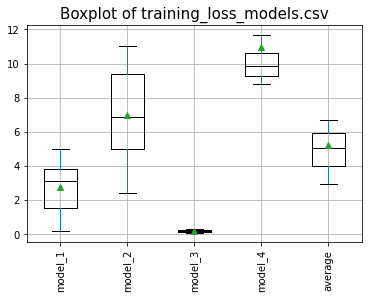

evaluation_accuracy_models.csv
          model_1  model_2  model_3  ...  model_2.2  model_3.2  model_4.2
epoch_01     0.23     0.45     0.49  ...       0.41       0.44       0.48
epoch_02     0.26     0.41     0.48  ...       0.37       0.43       0.49
epoch_03     0.25     0.36     0.45  ...       0.33       0.41       0.64
epoch_04     0.28     0.47     0.43  ...       0.43       0.39       0.55
epoch_05     0.23     0.42     0.47  ...       0.38       0.42       0.50
epoch_06     0.41     0.38     0.59  ...       0.34       0.53       0.50
epoch_07     0.25     0.37     0.45  ...       0.33       0.40       0.58
epoch_08     0.34     0.40     0.48  ...       0.36       0.43       0.62
epoch_09     0.40     0.41     0.55  ...       0.37       0.50       0.53
epoch_10     0.29     0.38     0.58  ...       0.34       0.52       0.59

[10 rows x 12 columns]
12


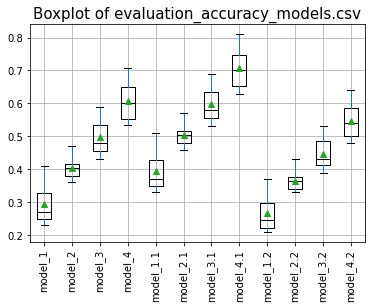

training_loss_model_sizes.csv
          training loss  ...  evaluation accuracy.2
epoch_01           5.00  ...                  0.778
epoch_02           4.50  ...                  0.658
epoch_03           3.90  ...                  0.793
epoch_04           3.45  ...                  0.757
epoch_05           3.60  ...                  0.810
epoch_06           2.80  ...                  0.812
epoch_07           2.10  ...                  0.706
epoch_08           1.34  ...                  0.807
epoch_09           0.93  ...                  0.856
epoch_10           0.18  ...                  0.860

[10 rows x 6 columns]
6


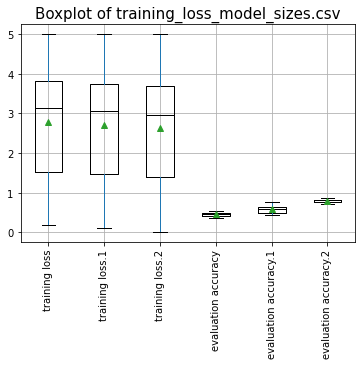

In [262]:
# all box plots
for key in list(all_dataframes.keys()):
  df = all_dataframes[key]
  print (key)
  print (df.head(20))
  all_min = df.min()
  absolute_min = all_min.min()
  num_epochs, num_models = df.shape

  #df.style.apply(highlight_min)

  #print (num_epochs, num_models)
  all_colors = get_best_color_list(num_models)
  all_columns = df.columns.tolist()
  #fig, ax = plt.subplots()


  # boxplots
  # demonstrate how to customize the display different elements:
  boxprops = dict(linestyle='-', linewidth=1, color='k')
  medianprops = dict(linestyle='-', linewidth=1, color='k')

  plt.figure(counter)
  ax = df.boxplot(column=all_columns,
            showfliers=False, showmeans=True,
            boxprops=boxprops,
            medianprops=medianprops)
  plt.title("Boxplot of %s" %key,fontsize=15)
  # get rid of the automatic 'Boxplot grouped by group_by_column_name' title
  plt.suptitle("")
  ax.set_xticklabels(labels = all_columns ,rotation=90)
  #plt.xticks(rotation=‌​45)

  plt.show()
  fig.tight_layout(pad=3.0)

## all plots

In [266]:
key = list(all_dataframes.keys())[0]
df = all_dataframes[key]
# get out the columns as lists
x_ax = df.index.tolist()
Y = dict() # dictionary

for c in all_columns:
  Y[c] = df[c].tolist()

training_loss_models.csv
          model_1  model_2  model_3  model_4   average
epoch_01     5.00    11.00   0.2587   20.820  9.269675
epoch_02     4.50    10.43   0.1553   11.678  6.690825
epoch_03     3.90     9.00   0.1822   10.620  5.925550
epoch_04     3.45     9.53   0.2913   10.497  5.942075
epoch_05     3.60     7.43   0.3155    9.852  5.299375
epoch_06     2.80     6.32   0.1133    9.839  4.768075
epoch_07     2.10     5.80   0.1081    9.526  4.383525
epoch_08     1.34     4.76   0.1851    9.170  3.863775
epoch_09     0.93     3.10   0.1113    8.911  3.263075
epoch_10     0.18     2.45   0.2543    8.824  2.927075
5
evaluation_accuracy_models.csv
          model_1  model_2  model_3  ...  model_2.2  model_3.2  model_4.2
epoch_01     0.23     0.45     0.49  ...       0.41       0.44       0.48
epoch_02     0.26     0.41     0.48  ...       0.37       0.43       0.49
epoch_03     0.25     0.36     0.45  ...       0.33       0.41       0.64
epoch_04     0.28     0.47     0.43  ... 

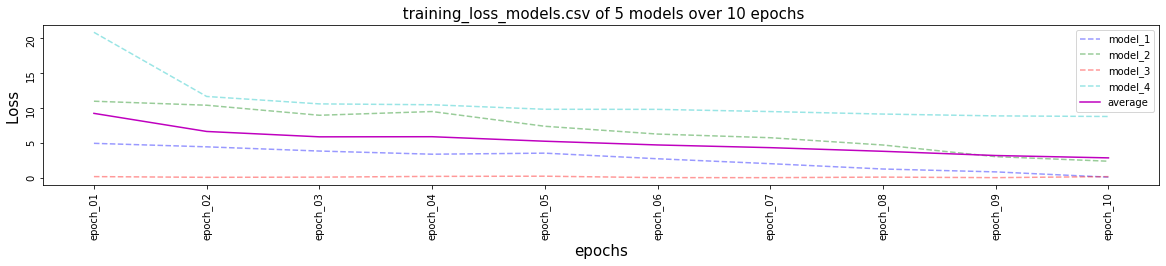

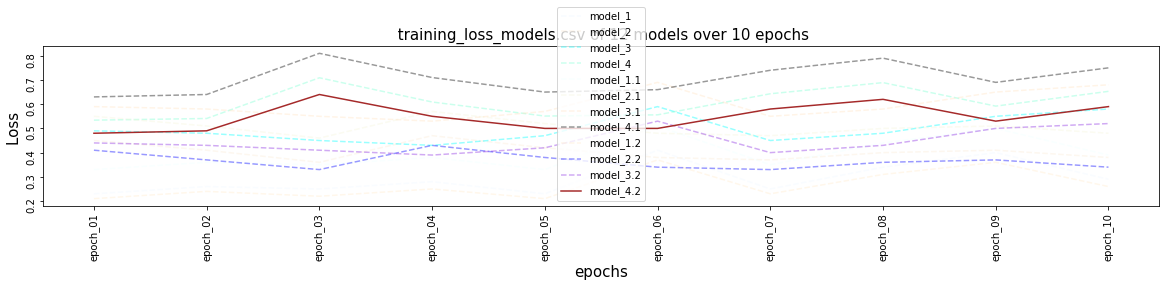

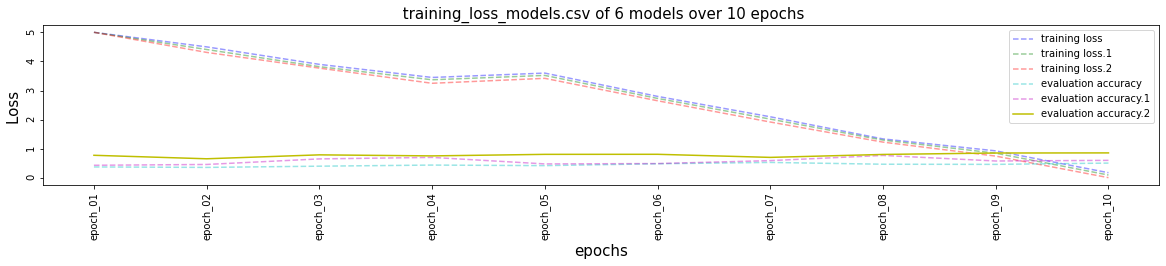

In [271]:
# all plots
counter = 1
for key in list(all_dataframes.keys()):
  df = all_dataframes[key]
  print (key)
  print (df.head(20))
  all_min = df.min()
  absolute_min = all_min.min()
  num_epochs, num_models = df.shape

  #print (num_epochs, num_models)
  all_colors = get_best_color_list(num_models)
  all_columns = df.columns.tolist()

  # get out the columns as lists
  x_ax = df.index.tolist()
  Y = dict() # dictionary

  for c in all_columns:
    Y[c] = df[c].tolist()
    
  fig = plt.figure(figsize=(20, 10))

  plt.subplot(3, 1, counter)

  thishandles=[]
  for j in range(len(Y)):
      if j != len(Y)-1:
        key = list(Y.keys())[j]
        y = Y[key]
        this_color = all_colors[j]
        this_alpha = 0.4
        this_label = all_columns[j]
        plt.plot(x_ax, y,"--", color= this_color, alpha = this_alpha, label = this_label)
        thishandles.append(this_label)
      
      else:
        key = list(Y.keys())[j]
        y = Y[key]
        this_color = all_colors[j]
        this_alpha = 1
        this_label = all_columns[j]
        plt.plot(x_ax, y, color= this_color, alpha = this_alpha, label = this_label)
        thishandles.append(this_label)

  plt.xticks(rotation=90)
  plt.yticks(rotation=90)
  plt.legend(thishandles)
  plt.xlabel("epochs", fontsize=15)
  plt.ylabel("Loss ", fontsize=15)
  plt.title(" %s of %s models over %s epochs" %(k,num_models,num_epochs) , fontsize=15)
  counter += 1

# one trial round

loading .csv file with results for various plots

In [192]:
# Read a csv file to a dataframe with custom delimiter
df =  pd.read_csv('datasets_overview.csv', sep=',',index_col=0 , engine='python')
df.head(10)

,model_1,model_2,model_3,model_4,average
epoch_01,5.00,11.00,0.2587,20.820,9.269675
epoch_02,4.50,10.43,0.1553,11.678,6.690825
epoch_03,3.90,9.00,0.1822,10.620,5.925550
epoch_04,3.45,9.53,0.2913,10.497,5.942075
epoch_05,3.60,7.43,0.3155,9.852,5.299375
epoch_06,2.80,6.32,0.1133,9.839,4.768075
epoch_07,2.10,5.80,0.1081,9.526,4.383525
epoch_08,1.34,4.76,0.1851,9.170,3.863775
epoch_09,0.93,3.10,0.1113,8.911,3.263075
epoch_10,0.18,2.45,0.2543,8.824,2.927075


In [193]:
all_min = df.min()
absolute_min = all_min.min()

In [194]:
s = df.style.applymap(color_best_red)
s

,model_1,model_2,model_3,model_4,average
epoch_01,5.000000,11.000000,0.258700,20.820000,9.269675
epoch_02,4.500000,10.430000,0.155300,11.678000,6.690825
epoch_03,3.900000,9.000000,0.182200,10.620000,5.925550
epoch_04,3.450000,9.530000,0.291300,10.497000,5.942075
epoch_05,3.600000,7.430000,0.315500,9.852000,5.299375
epoch_06,2.800000,6.320000,0.113300,9.839000,4.768075
epoch_07,2.100000,5.800000,0.108100,9.526000,4.383525
epoch_08,1.340000,4.760000,0.185100,9.170000,3.863775
epoch_09,0.930000,3.100000,0.111300,8.911000,3.263075
epoch_10,0.180000,2.450000,0.254300,8.824000,2.927075


In [195]:
df.style.apply(highlight_max)

,model_1,model_2,model_3,model_4,average
epoch_01,5.000000,11.000000,0.258700,20.820000,9.269675
epoch_02,4.500000,10.430000,0.155300,11.678000,6.690825
epoch_03,3.900000,9.000000,0.182200,10.620000,5.925550
epoch_04,3.450000,9.530000,0.291300,10.497000,5.942075
epoch_05,3.600000,7.430000,0.315500,9.852000,5.299375
epoch_06,2.800000,6.320000,0.113300,9.839000,4.768075
epoch_07,2.100000,5.800000,0.108100,9.526000,4.383525
epoch_08,1.340000,4.760000,0.185100,9.170000,3.863775
epoch_09,0.930000,3.100000,0.111300,8.911000,3.263075
epoch_10,0.180000,2.450000,0.254300,8.824000,2.927075


In [196]:
df.style.apply(highlight_min)

,model_1,model_2,model_3,model_4,average
epoch_01,5.000000,11.000000,0.258700,20.820000,9.269675
epoch_02,4.500000,10.430000,0.155300,11.678000,6.690825
epoch_03,3.900000,9.000000,0.182200,10.620000,5.925550
epoch_04,3.450000,9.530000,0.291300,10.497000,5.942075
epoch_05,3.600000,7.430000,0.315500,9.852000,5.299375
epoch_06,2.800000,6.320000,0.113300,9.839000,4.768075
epoch_07,2.100000,5.800000,0.108100,9.526000,4.383525
epoch_08,1.340000,4.760000,0.185100,9.170000,3.863775
epoch_09,0.930000,3.100000,0.111300,8.911000,3.263075
epoch_10,0.180000,2.450000,0.254300,8.824000,2.927075


In [197]:
num_epochs, num_models = df.shape

In [198]:
# fetch colors
all_colors = get_best_color_list(num_models)
all_colors

5


['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

In [199]:
# extract columns from df
all_columns = df.columns.tolist()
all_columns

['model_1', 'model_2', 'model_3', 'model_4', 'average']

In [200]:
list(df.columns.values)

['model_1', 'model_2', 'model_3', 'model_4', 'average']

training_loss_models.csv
          model_1  model_2  model_3  model_4   average
epoch_01     5.00    11.00   0.2587   20.820  9.269675
epoch_02     4.50    10.43   0.1553   11.678  6.690825
epoch_03     3.90     9.00   0.1822   10.620  5.925550
epoch_04     3.45     9.53   0.2913   10.497  5.942075
epoch_05     3.60     7.43   0.3155    9.852  5.299375
epoch_06     2.80     6.32   0.1133    9.839  4.768075
epoch_07     2.10     5.80   0.1081    9.526  4.383525
epoch_08     1.34     4.76   0.1851    9.170  3.863775
epoch_09     0.93     3.10   0.1113    8.911  3.263075
epoch_10     0.18     2.45   0.2543    8.824  2.927075
5


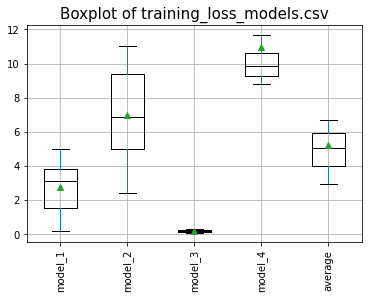

In [258]:
key = list(all_dataframes.keys())[0]
df = all_dataframes[key]
print (key)
print (df.head(20))
all_min = df.min()
absolute_min = all_min.min()
num_epochs, num_models = df.shape

#df.style.apply(highlight_min)

#print (num_epochs, num_models)
all_colors = get_best_color_list(num_models)
all_columns = df.columns.tolist()
#fig, ax = plt.subplots()


# boxplots
# demonstrate how to customize the display different elements:
boxprops = dict(linestyle='-', linewidth=1, color='k')
medianprops = dict(linestyle='-', linewidth=1, color='k')

plt.figure(counter)
ax = df.boxplot(column=all_columns,
          showfliers=False, showmeans=True,
          boxprops=boxprops,
          medianprops=medianprops)
plt.title("Boxplot of %s" %key,fontsize=15)
# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("")
ax.set_xticklabels(labels = all_columns ,rotation=90)
#plt.xticks(rotation=‌​45)

plt.show()


## Box plots

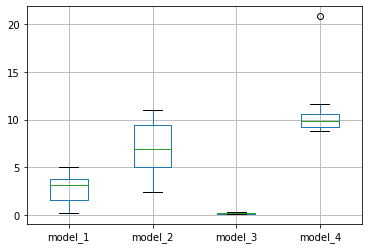

In [146]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
boxplot = df.boxplot(column=all_columns[:-1])

## Plots

In [24]:
# get out the columns as lists
x_ax = df.index.tolist()
Y = dict() # dictionary

for c in all_columns:
  Y[c] = df[c].tolist()

## compare training loss and training accuracies of multiple models

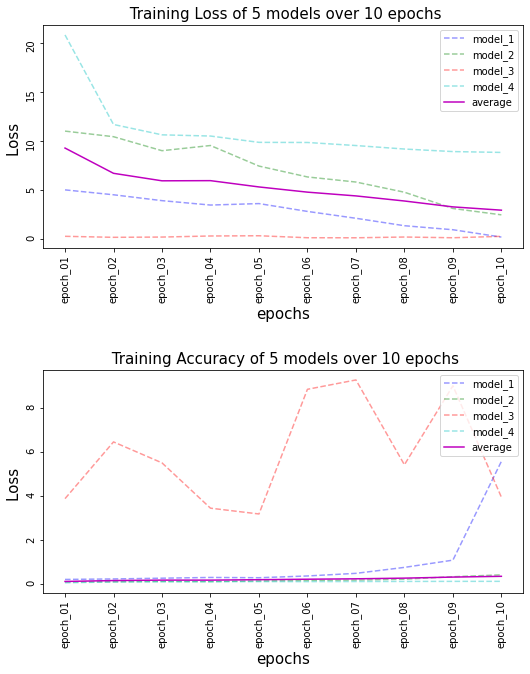

In [65]:
fig = plt.figure(figsize=(8, 10))

plt.subplot(2, 1, 1)

thishandles=[]
for j in range(len(Y)):
    if j != len(Y)-1:
      key = list(Y.keys())[j]
      y = Y[key]
      this_color = all_colors[j]
      this_alpha = 0.4
      this_label = all_columns[j]
      plt.plot(x, y,"--", color= this_color, alpha = this_alpha, label = this_label)
      thishandles.append(this_label)
    
    else:
      key = list(Y.keys())[j]
      y = Y[key]
      this_color = all_colors[j]
      this_alpha = 1
      this_label = all_columns[j]
      plt.plot(x, y, color= this_color, alpha = this_alpha, label = this_label)
      thishandles.append(this_label)

plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.legend(thishandles)
plt.xlabel("epochs", fontsize=15)
plt.ylabel("Loss ", fontsize=15)
plt.title(" Training Loss of %s models over %s epochs" %(num_models,num_epochs) , fontsize=15)

plt.subplot(2, 1, 2)
thishandles=[]
for j in range(len(Y)):
    if j != len(Y)-1:
      key = list(Y.keys())[j]
      y = Y[key]
      y = [(1/element) for element in y]
      this_color = all_colors[j]
      this_alpha = 0.4
      this_label = all_columns[j]
      plt.plot(x, y,"--", color= this_color, alpha = this_alpha, label = this_label)
      thishandles.append(this_label)
    
    else:
      key = list(Y.keys())[j]
      y = Y[key]
      y = [(1/element) for element in y] # this is just to fake accuracies
      this_color = all_colors[j]
      this_alpha = 1
      this_label = all_columns[j]
      plt.plot(x, y, color= this_color, alpha = this_alpha, label = this_label)
      thishandles.append(this_label)

plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.legend(thishandles)
plt.xlabel("epochs", fontsize=15)
plt.ylabel("Loss ", fontsize=15)
plt.title(" Training Accuracy of %s models over %s epochs" %(num_models,num_epochs) , fontsize=15)

fig.tight_layout(pad=3.0)

## random values for dummy test

In [94]:
import random

In [133]:
# random accuracies

#all_col = 3*4
start = 0
array =  list()
for c in range(4):
  print ("----------------")
  start = start +0.1
  end = start+ 0.2
  sampling = []
  increment = 0.10
  for i in range(10):
    x = random.uniform(start,end)
    random_inc = random.uniform(0.01,0.08)
    increment = increment *(1+random_inc) 
    sampling.append(round(x+increment,3))
  array.append(sampling)
  for i in sampling:
    print (i)

----------------
0.231
0.263
0.247
0.28
0.228
0.413
0.251
0.342
0.402
0.285
----------------
0.45
0.413
0.362
0.473
0.421
0.383
0.371
0.397
0.409
0.382
----------------
0.49
0.476
0.453
0.431
0.47
0.59
0.445
0.48
0.552
0.577
----------------
0.534
0.541
0.709
0.609
0.551
0.556
0.643
0.689
0.592
0.653


In [119]:
array

[[0.584, 0.602, 0.597, 0.631, 0.674, 0.612, 0.637, 0.71, 0.72, 0.636],
 [0.685, 0.651, 0.714, 0.636, 0.688, 0.675, 0.708, 0.708, 0.704, 0.745],
 [0.844, 0.784, 0.817, 0.821, 0.847, 0.824, 0.757, 0.858, 0.781, 0.81],
 [0.843, 0.855, 0.962, 0.944, 0.931, 0.859, 0.854, 0.954, 0.904, 0.896]]

In [122]:
import numpy as np
a = np.array(array)
#print(a)
final = a.T
print (final)

[[0.584 0.685 0.844 0.843]
 [0.602 0.651 0.784 0.855]
 [0.597 0.714 0.817 0.962]
 [0.631 0.636 0.821 0.944]
 [0.674 0.688 0.847 0.931]
 [0.612 0.675 0.824 0.859]
 [0.637 0.708 0.757 0.854]
 [0.71  0.708 0.858 0.954]
 [0.72  0.704 0.781 0.904]
 [0.636 0.745 0.81  0.896]]


In [125]:
df = pd.DataFrame(data=final)#, columns=all_columns[:-1])
df.head(10)

,0,1,2,3
0,0.584,0.685,0.844,0.843
1,0.602,0.651,0.784,0.855
2,0.597,0.714,0.817,0.962
3,0.631,0.636,0.821,0.944
4,0.674,0.688,0.847,0.931
5,0.612,0.675,0.824,0.859
6,0.637,0.708,0.757,0.854
7,0.710,0.708,0.858,0.954
8,0.720,0.704,0.781,0.904
9,0.636,0.745,0.810,0.896


In [126]:
df[0]

0    0.584
1    0.602
2    0.597
3    0.631
4    0.674
5    0.612
6    0.637
7    0.710
8    0.720
9    0.636
Name: 0, dtype: float64